<a href="https://colab.research.google.com/github/CDspana/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Christian/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
val=list(df['Class'].value_counts())

for i in range(len(val)):
  print(df['Class'].value_counts().index[i], round(val[i]/sum(val)*100, 2),'%')

0 99.83 %
1 0.17 %


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

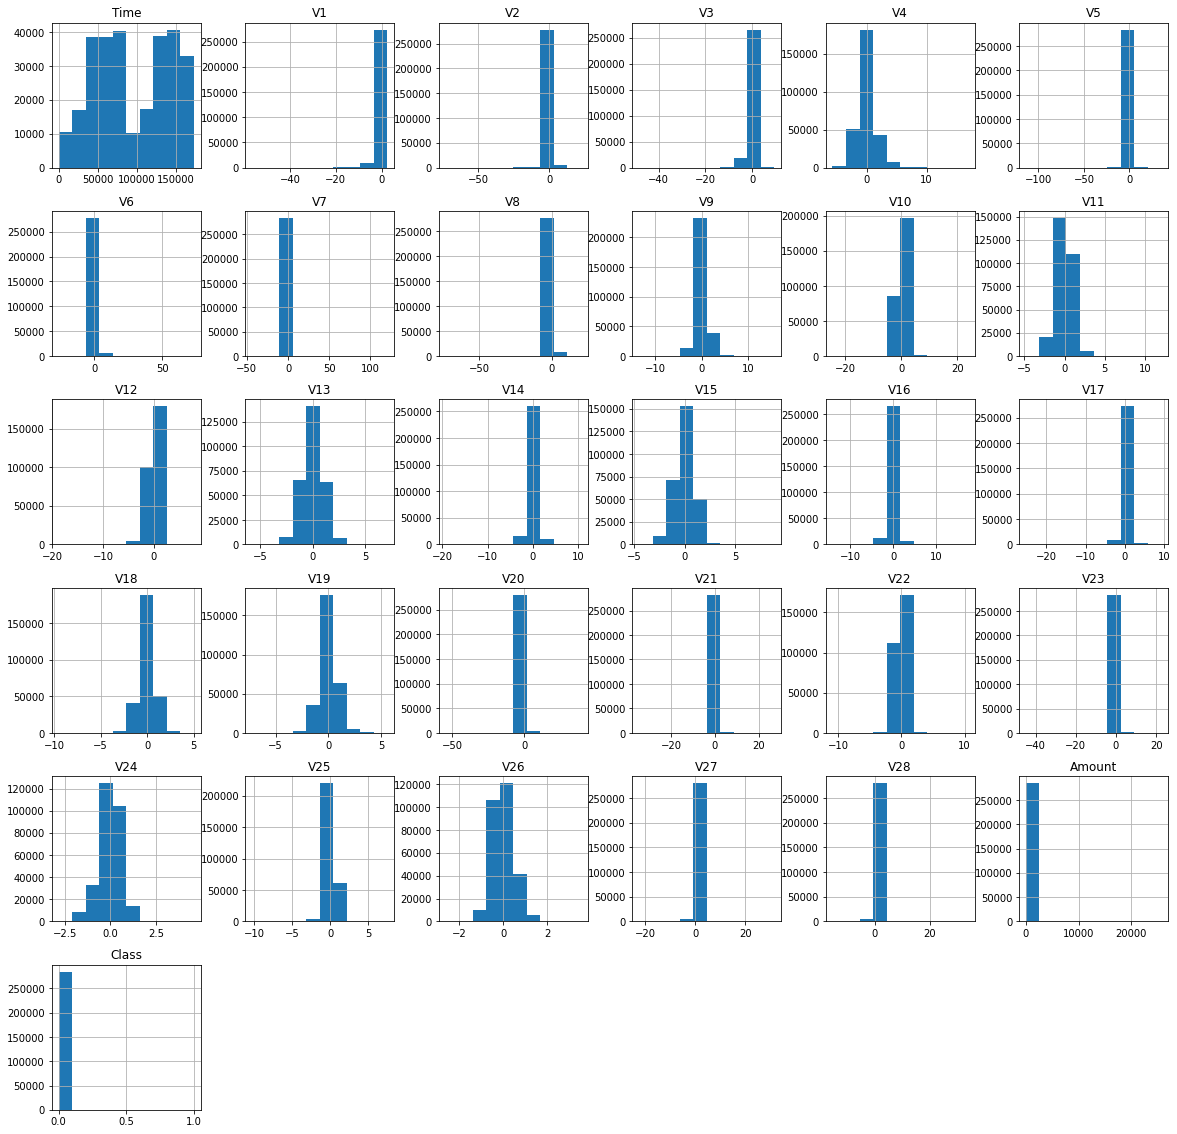

In [5]:
df.hist(figsize = (20, 20))
plt.show()

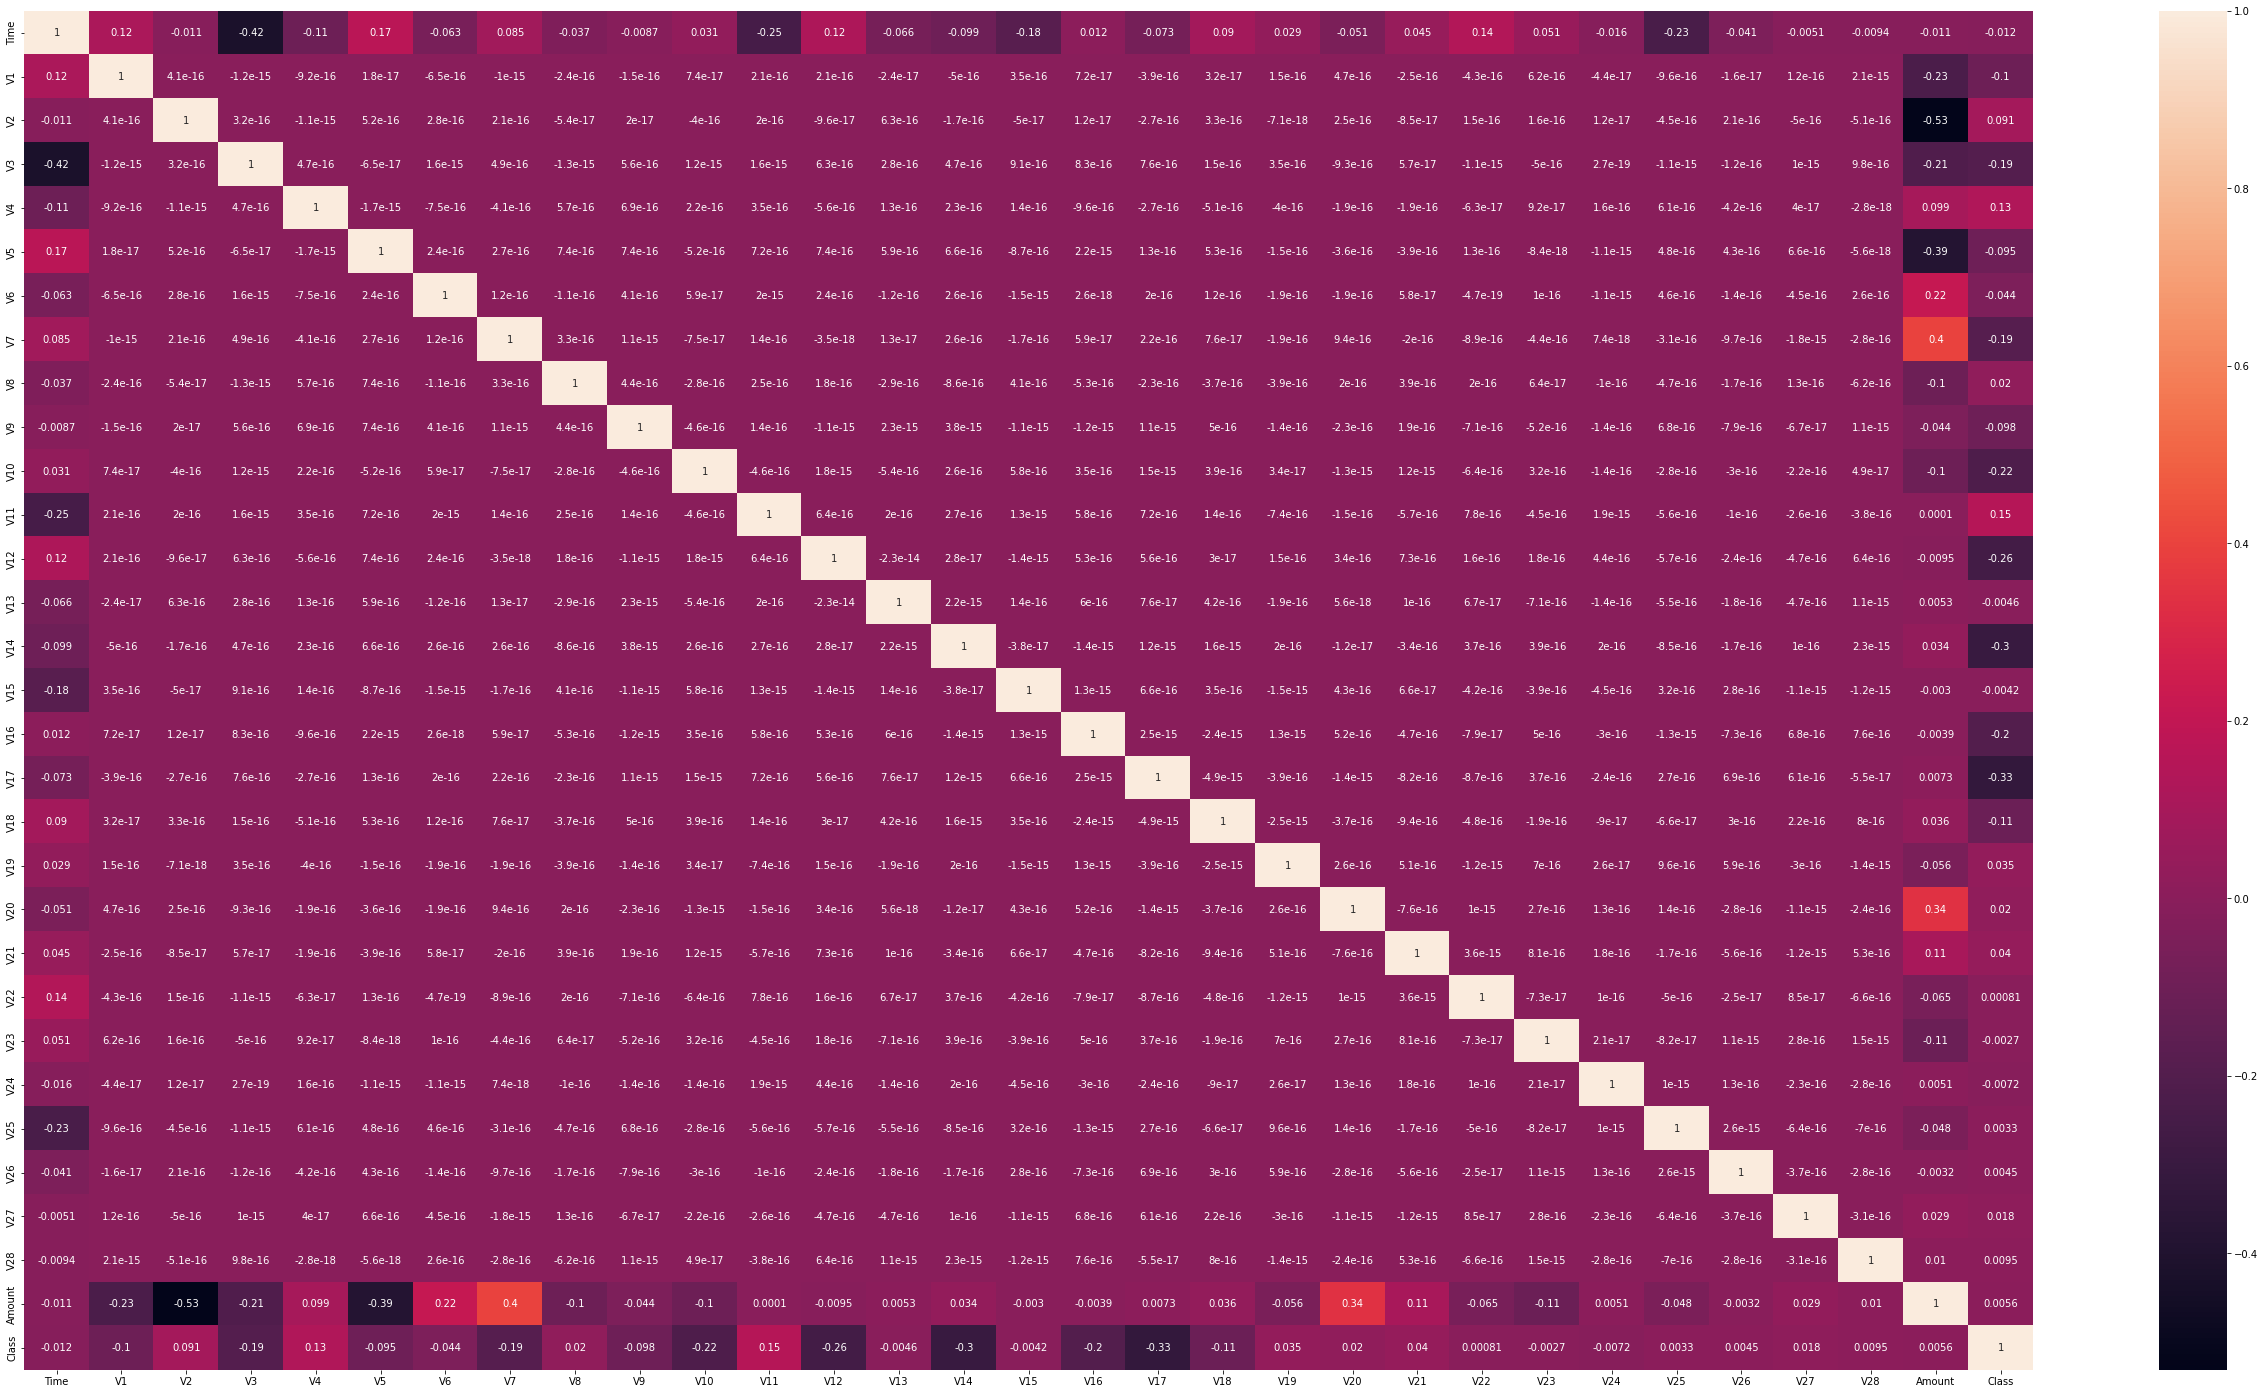

In [6]:
plt.figure(figsize=(45,25))
sns.heatmap(df.corr(),annot=True)

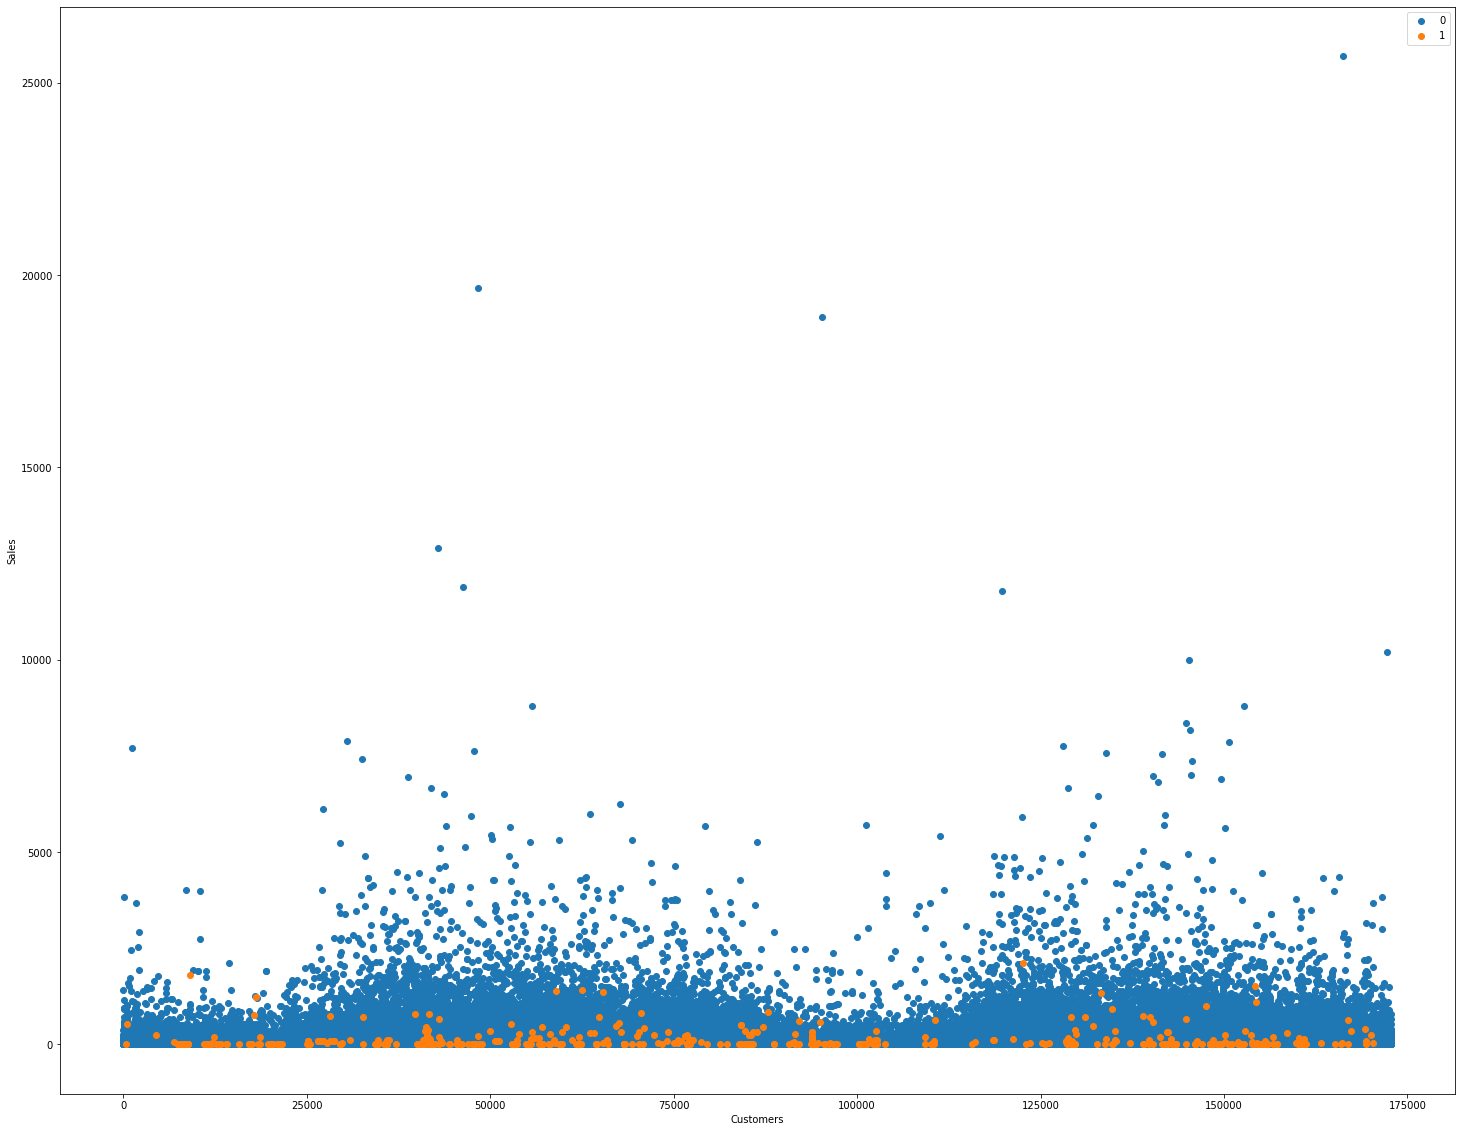

In [7]:
plt.figure(figsize=(25,20))
for i in [0, 1]:
  data = df[df['Class'] == i]
  plt.scatter(data['Time'], data['Amount'], label = i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')

plt.show()

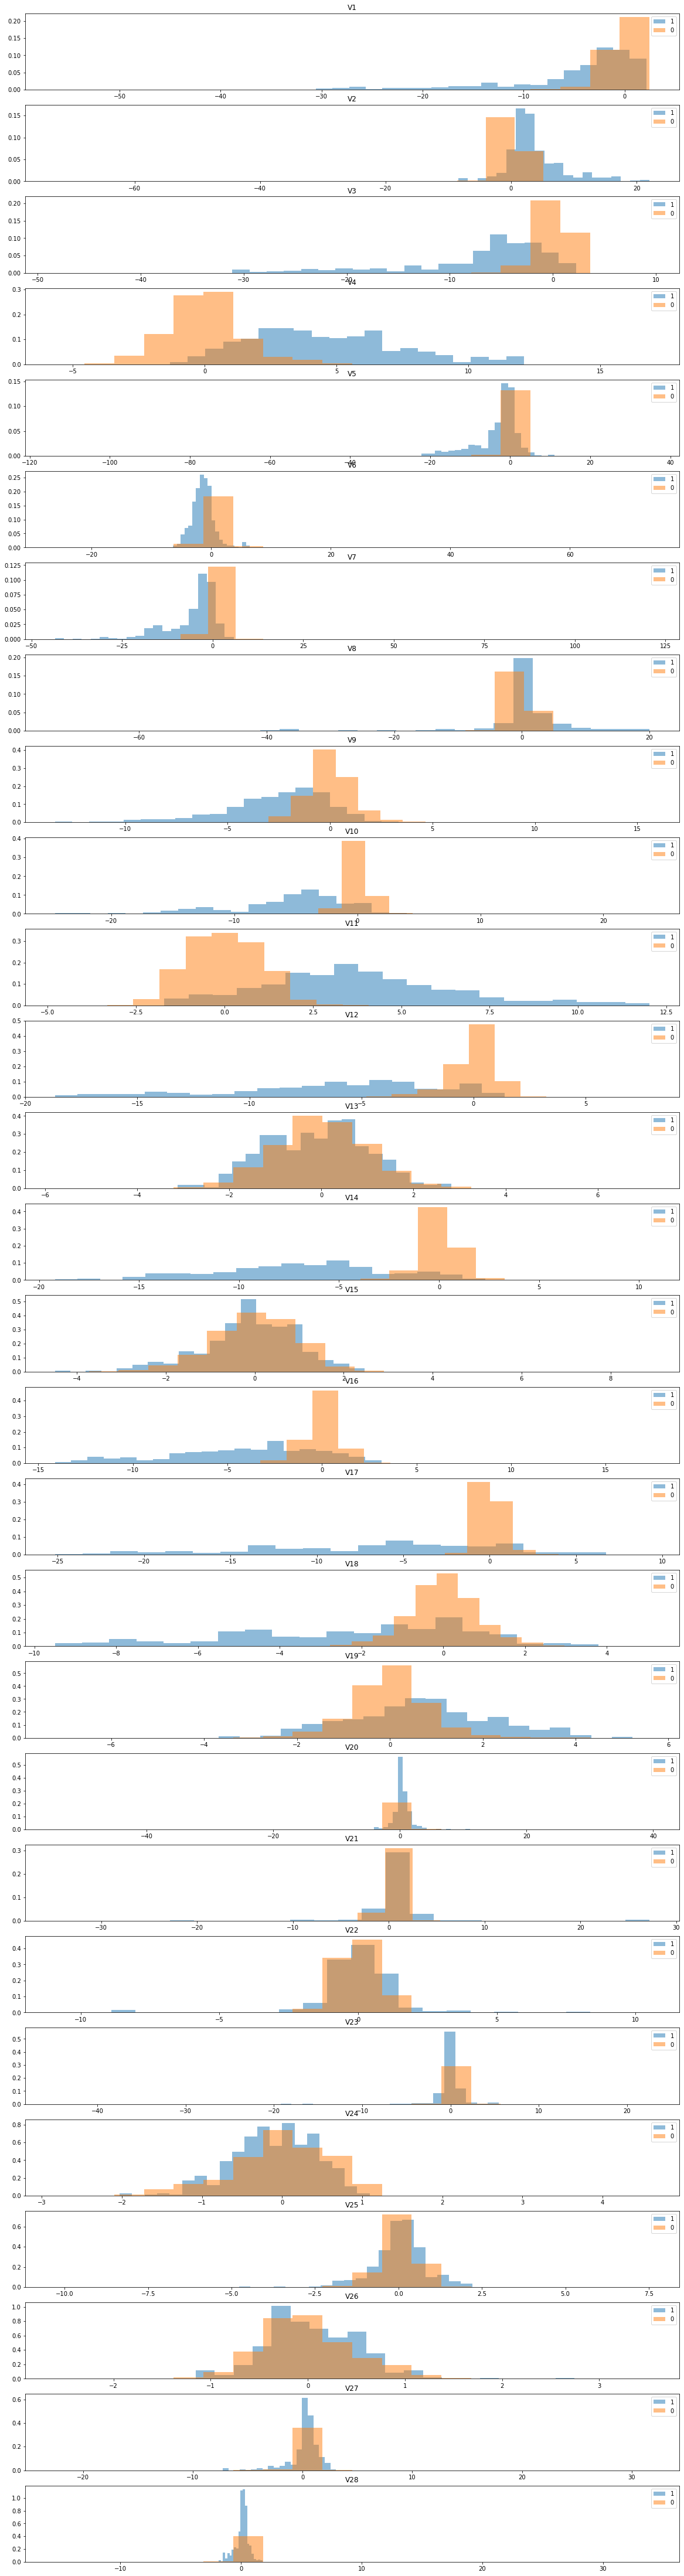

In [8]:
v_1_28 = df.iloc[:,1:29].columns
fig, ax = plt.subplots(28, 1, figsize=(20, 80))
k = 0
for cat_colum, subplot in zip(v_1_28, ax.flatten()):
  ax[k].hist(df.loc[df['Class'] == 1, cat_colum].values, bins = 20, label = '1', alpha = 0.5, density = True)
  ax[k].hist(df.loc[df['Class'] == 0, cat_colum].values, bins = 20, label = '0', alpha = 0.5, density = True)
  ax[k].legend(loc = 'best')
  ax[k].set_title(cat_colum)

  k += 1

Con el anterior analisis se puede concluir que no hay una diferencia clara en donde las transacciones normales y las fraudulentas no pueden ser discriminadas por la variable tiempo

In [9]:
df.drop(['Time'], axis = 1, inplace = True)

**Dado que la mayoria de variables han sido escaladas, se procederá a escalar tambien la variable Amount**

In [10]:
# RobustScaler es menos propenso a valores atípicos
from sklearn.preprocessing import  RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'], axis=1, inplace=True)

In [11]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680


In [12]:
def Trainmodel(X, y, model, params, cv = 5):

  np.random.seed(10)

  x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

  grid = GridSearchCV(
      estimator=model,
      param_grid = params,
      cv = cv,
      scoring='accuracy', verbose=1
  )

  grid_result = grid.fit(x_train, y_train)
  best_params = grid_result.best_params_
  pred = grid_result.predict(x_test)
  cm = confusion_matrix(y_test, pred)
   
  #print(pred)    
   
  print('Best Params :',best_params)
  print('Classification Report : \n',classification_report(y_test,pred))
  print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
  print('Confusion Matrix : \n', cm)

X = df.drop(['Class'], axis = 1)
Y = df['Class']

# Balancing Dataset

**Under-Sampling**

In [13]:
from imblearn.under_sampling import NearMiss

In [14]:
us = NearMiss(version=2)
X_us, Y_us = us.fit_resample(X, Y)
pd.Series(Y_us).value_counts()

0    492
1    492
Name: Class, dtype: int64

**Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()


params_LR = {
    'penalty':['l1', 'l2'],
    'C': np.logspace(0, 4, 10),
    'max_iter': [200, 400]
    
}

Trainmodel(X_us, Y_us, LogisticRegression(n_jobs=-1), params_LR, cv = 5)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params : {'C': 1.0, 'max_iter': 200, 'penalty': 'l2'}
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       102
           1       0.94      0.94      0.94        95

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Accuracy Score : 0.9390862944162437
Confusion Matrix : 
 [[96  6]
 [ 6 89]]


**XGBOOST**

In [16]:
from xgboost import XGBClassifier

params_XGB = {
    'n_estimators':[100, 500, 1000, 2000]
}

Trainmodel(X_us, Y_us, XGBClassifier(), params_XGB, cv = 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params : {'n_estimators': 100}
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.98      1.00      0.99        95

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197

Accuracy Score : 0.9898477157360406
Confusion Matrix : 
 [[100   2]
 [  0  95]]


**Random Forest**

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
params_RF = {
    'n_estimators': [100, 500, 1000, 2000, 3000]
}

Trainmodel(X_us, Y_us, RandomForestClassifier(), params_RF, cv = 5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Params : {'n_estimators': 100}
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.99      0.99      0.99        95

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197

Accuracy Score : 0.9898477157360406
Confusion Matrix : 
 [[101   1]
 [  1  94]]


**SVC**

In [19]:
from sklearn.svm import SVC

In [20]:
params_SVC = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

Trainmodel(X_us, Y_us, SVC(), params_SVC, cv = 5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Params : {'C': 100, 'gamma': 0.005}
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      0.99        95

    accuracy                           0.99       197
   macro avg       0.99      1.00      0.99       197
weighted avg       0.99      0.99      0.99       197

Accuracy Score : 0.9949238578680203
Confusion Matrix : 
 [[101   1]
 [  0  95]]


# Over Samplig

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE()

In [23]:
X_os, Y_os = sm.fit_resample(X, Y)
pd.Series(Y_os).value_counts()

0    284315
1    284315
Name: Class, dtype: int64

**Logistic Regression**

In [24]:
Trainmodel(X_os, Y_os, LogisticRegression(n_jobs=-1), params_LR, 5) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params : {'C': 21.544346900318832, 'max_iter': 200, 'penalty': 'l2'}
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56989
           1       0.97      0.92      0.95     56737

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Accuracy Score : 0.9468371348680161
Confusion Matrix : 
 [[55631  1358]
 [ 4688 52049]]


In [ ]:
Trainmodel(X_os, Y_os, RandomForestClassifier(), params_RF, cv = 5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
Trainmodel(X_os, Y_os, SVC(), params_SVC, cv = 5)

# due to the size of the dataset and with the hardware offered by google it was not possible to train it with more models.